**Sentimental Analysis**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#import os
#dir_Path = 'F://'
#os.chdir(dir_Path)

import pandas as pd
Reviewdata = pd.read_csv('/content/drive/MyDrive/train.csv')
#Data credit - https://www.kaggle.com/anu0012/hotel-review/data
Reviewdata.shape

(38932, 5)

In [ ]:
Reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [ ]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id21962,1
Description,38932,38932,I booked this hotel using the betting option a...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


**Data cleaning /** **EDA**

In [ ]:
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count,percentage],axis=1,
keys=['Count','Percentage'])

print('count and percentage of missing values for the columns:')

missing_data

count and percentage of missing values for the columns:


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


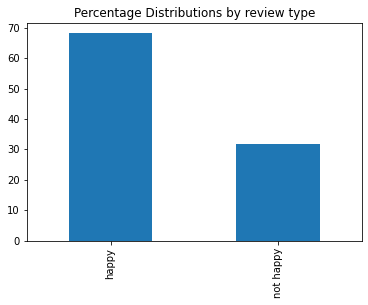

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

**Removing unwanted columns**

In [ ]:
Reviewdata.drop(columns = ['User_ID','Browser_Used','Device_Used'],inplace=True)

**Applying first level of cleaning**

In [ ]:
import re
import string

def text_clean_1(text):
  text = text.lower()
  text = re.sub('\[."?\]','',text)
  text = re.sub("[%s]" % re.escape(string.punctuation),'',text)
  text = re.sub('\w"\d\w"','',text)
  return text

cleaned1 = lambda x: text_clean_1(x)

In [ ]:
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


**Applying second level of cleaning**

In [ ]:
def text_clean_2(text):
  text = re.sub('[''""_]', '', text)
  text = re.sub('\n', '', text)
  return text

cleaned2 = lambda x:text_clean_2(x)

In [ ]:
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.Is_Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test :', len(DV_test))

IV_train : 35038
IV_test : 3894
DV_train : 35038
DV_test : 3894


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[2420,  297],
       [ 151, 1026]])

**Model prediction**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8849512069851053
Precision :  0.8911660597365276
Recall :  0.8849512069851053


**Implementing new reviews**

In [ ]:
example = ["I'm frustrated"]
result = model.predict(example)

print(result)

['not happy']


In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Download/comments.txt",sep="\n")

df = pd.DataFrame(data, columns = ['feedback'])

comments=[]

for i in df.index:
  comments.append(df['feedback'][i])
  #print((df['feedback'][i]))

  result = model.predict(comments)
#print(l)
#print(result)
data=[]
positive=0
negative=0
for i in result:
  if i == 'happy':
    data.append(10)
    positive+=1
  else:
    data.append(5)
    negative+=1


total=positive+negative
happy=float((positive/total)*100)
not_happy=float((negative/total)*100)
print("happy:",happy)
print("not happy:",not_happy)

happy: 84.02154398563735
not happy: 15.978456014362658


happy: 84.02154398563735
not happy: 15.978456014362658


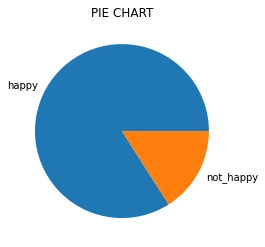

In [ ]:
pi=[happy,not_happy]
label=['happy','not_happy']

print("happy:",happy)
print("not happy:",not_happy)

plt.title("PIE CHART") 
plt.pie(pi,labels=label)
plt.show()


In [ ]:
#print(len(comments))
#print(len(result))

dic={}

for i in range(len(comments)):
  dic[comments[i]]=result[i]

#print(dic)

negative_comments=[]

for x, y in dic.items():
  if y!='happy':
    negative_comments.append(x)

print(negative_comments)


['The (basic) room was comfortable and not too small.', 'Some are fairly easy, but I definitely get stuck.', 'Nothing at all.', 'No one else can convey the experience of playing this game to you through mere words.', 'This Demo is Reasonable, but you can get tired of it in at least two days of gameplay.', "Half my group were served and remainder weren't as just after 0300", 'Damn, its too slow!!!', 'No noise.', 'Breakfast room is not as nice as the rest of the hotel', 'Okay location', "Skype is NOT instagram, it's NOT Facebook, It's NOT supposed ro be anyrhing else but Skype.", '(A square border frame appear on the output image)', 'Fortunately I managed to leave an elevator.', 'The property was going through some renovations of which I hope they extend to the rest of the property.', 'No mini game or anything like that.', 'i must play and then tell you about this', 'You can lear this in 5 minutes and get it running.', 'I have to say that I was not disappointed.', 'It has pretty much ret

In [ ]:
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Removing Stop Words**

In [ ]:
#removing stop words
stop_words = set(stopwords.words('english'))

filter=[]

for i in negative_comments:
  word_tokens = word_tokenize(i)  
  filtered_sentence = [w for w in word_tokens if not w in stop_words]  
  filter+=filtered_sentence
  #print(filtered_sentence)
#print(filter)

filter=set(filter)

neg_key_words=[]

for i in filter:
  blob=TextBlob(i)
  if(len(i)>5) and blob.sentiment.polarity != 0:
    #print(i+":"+str(blob.sentiment.polarity))
    neg_key_words.append(i)

print(neg_key_words)

['average', 'horrible', 'adequate', 'catching', 'hardly', 'exactly', 'Reasonable', 'higher', 'expected', 'Fortunately', 'useful', 'charming', 'really', 'beautiful', 'pretty', 'disappointed', 'comfortable', 'memorable', 'exquisitely', 'repetitive', 'satisfying', 'honestly', 'confused', 'fairly', 'stinks', 'winning', 'better']


**Image to text**

In [ ]:
!pip install tesseract
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
!which tesseract

/usr/bin/tesseract


In [ ]:
import pytesseract
from PIL import Image

pytesseract.pytesseract.tesseract_cmd = r"/usr/bin/tesseract"

img = Image.open('/content/drive/MyDrive/sample.jpg')
text = pytesseract.image_to_string(img)
print(text)

Reviews

tet Thorough and Timely Support
Media Cafe September 16, 2019

 

 

The support | received was thorough and timely and my issue
was addressed with a single interaction. Awesome!

kender September 12,2019

(4 tek kw Perfect customer support

The plugin works as advertised, and with my customization re-
quests the support team was quick to respond with sample
code to help me meet my specific needs. Would definitely rec-
ommend this to meet your wholesaler needs on any woocam-
merce site



happy: 72.22222222222221
not happy: 27.77777777777778


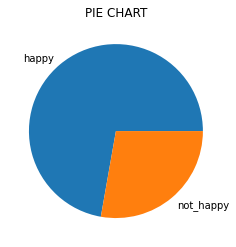

In [ ]:
def Convert(string): 
    if string != "" :
	    li = list(string.strip("\n").split(" ")) 
    return li

p=Convert(text)	 


result = model.predict(p)
#print(l)
#print(result)
data=[]
positive=0
negative=0
for i in result:
  if i == 'happy':
    data.append(10)
    positive+=1
  else:
    data.append(5)
    negative+=1


total=positive+negative
happy=float((positive/total)*100)
not_happy=float((negative/total)*100)
print("happy:",happy)
print("not happy:",not_happy)


pi=[happy,not_happy]
label=['happy','not_happy']



plt.title("PIE CHART") 
plt.pie(pi,labels=label)
plt.show()



